# <img style="float: left; padding-right: 20px; height: 70px" src="https://i.imgur.com/cMzxwTN.jpg"> Fundamentos de Machine Learning


## **Actividad `II` Sesion 6**
## Aprendizaje no supervisado 
## Hierarchical clustering


**Universidad Privada Boliviana**<br/>
**Diplomado en Machine Learning y Ciencia de Datos**<br/>


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import fcluster, ward, linkage
from scipy.spatial.distance import pdist, squareform

## Conjunto de datos de animales del zoológico

El [Zoo Animals Dataset](https://www.kaggle.com/datasets/uciml/zoo-animal-classification?select=zoo.csv) 
consta de 100 filas únicas, cada una con:
- el **nombre** del animal
- **16 características binarias** que codifican rasgos de animales
- uno de los **7 tipos de clase**: mamífero, ave, reptil, pez, anfibio, insecto e invertebrado.


In [2]:
# leer los datos
df=pd.read_csv("data/zoo.csv")
df.head()
# si no es domestico es 0, si tiene cola tiene 1


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
# Verificar si existen elementos duplicados en las filas
filtro= df.duplicated(subset="animal_name")
# elimine la fila duplicada animal_name del conjunto de datos original.
df= df[-filtro].reset_index(drop=True)


In [4]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
#manera de especificar estas columnas con variables
#si tiene pelo y produce leche que se cree una columna para saber
#se borra las columnas que no se necesita yse hace agrupamiento
#no se tiene etiquetas
X= df.drop(["animal_name","class_type"],axis=1)
X.head()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [5]:
X=pd.get_dummies(X,columns=["legs"])
X = X*1
X.head()
#animales que tienen hasta 8 patas

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,fins,tail,domestic,catsize,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,0,1,0,1,0,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,1,1,0,0,1,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,0,1,0,1,0,0,1,0,0,0


## Hierarchical Clustering

Dada la naturaleza biológica del conjunto de datos, parece razonable que el agrupamiento jerárquico capture la estructura similar a un árbol que podríamos esperar que esté presente en los datos.

In [6]:
from scipy.spatial.distance import pdist, squareform

[scipy.spatial.distance.pdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html)

Primero, necesitamos las distancias por pares entre los puntos de datos.\
Hay muchas métricas de distancia entre las que se puede elegir, y la elección afectará los resultados de la agrupación.

Use `pdist` para calcular las distancias euclidianas por pares entre puntos en la matriz de datos `X` y guárdelas en `dist_mat`.

In [7]:
### edTest(test_pdist) ###
dist_mat = pdist(X,metric="euclidean")

`pdist` devuelve un vector, pero se puede remodelar en la matriz $N\times N$ de distancias por pares.\
La `forma cuadrada` de Scipy es una buena función de utilidad para 'descomponer' una matriz cuadrada.

In [8]:
dist_mat.shape, squareform(dist_mat).shape

((4950,), (100, 100))

Si observa la esquina superior de $5\times 5$ de la matriz, verá que el cero está en la diagonal, como era de esperar.

In [9]:
squareform(dist_mat)[:5,:5]

array([[0.        , 1.41421356, 3.16227766, 0.        , 1.        ],
       [1.41421356, 0.        , 3.16227766, 1.41421356, 1.        ],
       [3.16227766, 3.16227766, 0.        , 3.16227766, 3.        ],
       [0.        , 1.41421356, 3.16227766, 0.        , 1.        ],
       [1.        , 1.        , 3.        , 1.        , 0.        ]])

## Linkage

In [10]:
from scipy.cluster.hierarchy import linkage

[scipy.cluster.hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage)\

Ahora que tenemos las distancias por pares, necesitamos especificar un algoritmo de agrupamiento.\
Una opción es utilizar un método de vinculación:
- Enlace `'completo'`: Para dos conglomerados, determine la disimilitud máxima entre cualquier observación en el primer conglomerado y cualquier observación en el segundo
grupo.
- Enlace `'único'`: Para dos grupos, determine la diferencia mínima entre
cualquier observación en el primer grupo y cualquier observación en el segundo grupo.
- Enlace `'promedio'`: Calcule todas las diferencias por pares entre las observaciones en
el primer y segundo grupo, y calcule el promedio.

Seleccione uno de los tres métodos anteriores y guárdelo en `linkage_method`.

In [11]:

linkage_method = "single"
Z_linkage = linkage(dist_mat, method=linkage_method)

print("Z linkage")
print(Z_linkage[:5], '\n...\n',Z_linkage[-5:])

Z linkage
[[  0.   3.   0.   2.]
 [  4.  10.   0.   2.]
 [ 43. 101.   0.   3.]
 [ 44. 102.   0.   4.]
 [ 46. 103.   0.   5.]] 
...
 [[187.         193.           1.73205081  77.        ]
 [ 52.         194.           1.73205081  78.        ]
 [ 89.         195.           1.73205081  79.        ]
 [177.         196.           1.73205081  99.        ]
 [ 71.         197.           2.23606798 100.        ]]


Esta matriz representa un dendrograma, donde el primer y el segundo elemento son los dos grupos fusionados en cada paso, el tercer elemento es la distancia entre estos grupos y el cuarto elemento es el tamaño del nuevo grupo: la cantidad de puntos de datos originales incluidos .

In [12]:
from scipy.cluster.hierarchy import dendrogram

[scipy.cluster.hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)

El método `dendrogram` utiliza datos de vinculación para trazar la estructura de árbol de los grupos jerárquicos.\
Utilice los datos de vinculación en `Z_linkage` para trazar el dendrograma. Pase `animal_names` como el argumento `labels`.

In [13]:
from scipy.cluster.hierarchy import dendrogram

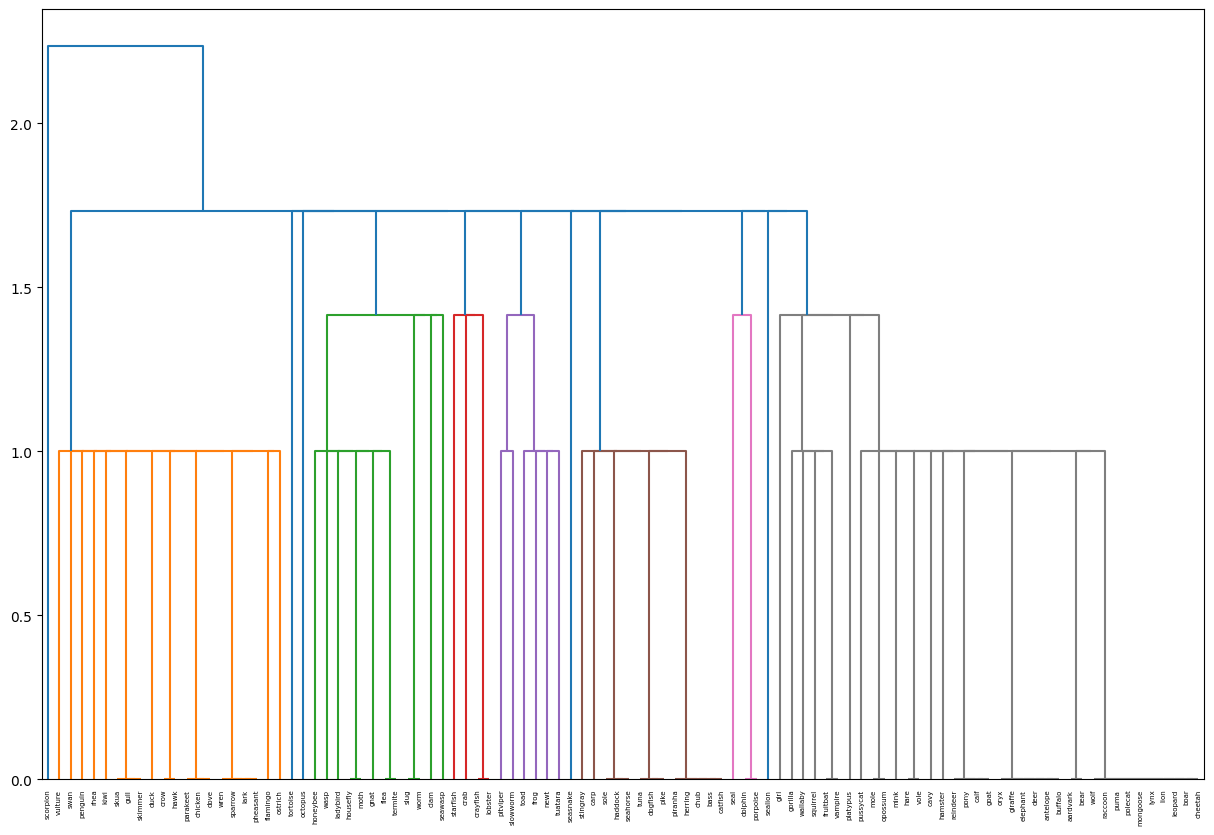

In [14]:
df_or = pd.read_csv("data/zoo.csv")
animales_etiq = df["animal_name"].values
plt.figure(figsize=(15,10))
dendrogram(Z_linkage,labels=animales_etiq)
plt.savefig("dendrogram.pdf")
plt.show()

In [15]:
# Definir número de clusters deseado (Ejemplo: 3 clusters)
num_clusters = 4
clusters = fcluster(Z_linkage, t=num_clusters, criterion='maxclust')

# O definir un umbral de distancia
threshold_distance = 1.5
clusters_by_distance = fcluster(Z_linkage, t=threshold_distance, criterion='distance')

print("Clusters por número:", clusters)
print("Clusters por distancia:", clusters_by_distance)

Clusters por número: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Clusters por distancia: [ 7  7  5  7  7  7  7  5  5  7  7  1  5  2  3  3  1  7  5  6  1  1  7  1
  2  4  7  7  7  2  7  7  1  5  7  7  1  5  2  2  1  2  1  7  7  3  7  7
  7  7  2  4 10  7  7  1  1  1  1  5  5  4  7  7  7  6  7  7  7  7  1 12
  5  6  8  9  2  1  1  4  2  5  1  7  3  5  1  2  4 11  4  5  7  7  1  7
  2  7  2  1]


In [16]:
# ahora imprimir los nombres de los animales de un cluster
# en este caso el cluster 1
cluster_1 = np.where(clusters_by_distance == 1)[0]
print("Animales en el cluster 1:", df["animal_name"].values[cluster_1]) 

Animales en el cluster 1: ['chicken' 'crow' 'dove' 'duck' 'flamingo' 'gull' 'hawk' 'kiwi' 'lark'
 'ostrich' 'parakeet' 'penguin' 'pheasant' 'rhea' 'skimmer' 'skua'
 'sparrow' 'swan' 'vulture' 'wren']


🙌**El fin**